<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.341750,52.283821,43.027349,-7.620739,170.032181,178.714238,-8.682056
1,0.0,1.0,85.450017,47.765168,80.146729,-0.134966,223.226949,221.936718,1.290231
2,0.0,2.0,90.911747,81.320790,49.851172,10.958072,243.041780,231.574858,11.466922
3,0.0,3.0,30.448972,65.882782,48.418105,11.291660,166.041519,156.594692,9.446826
4,0.0,4.0,92.055302,46.794606,89.168425,-2.622436,235.395896,235.875040,-0.479143
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.746428,47.764821,55.626744,-0.893698,146.244295,144.804699,1.439596
29996,999.0,26.0,97.187365,21.116072,49.348429,0.782270,178.434136,177.440951,0.993185
29997,999.0,27.0,47.606113,44.399782,55.404891,-0.227641,157.183145,155.634088,1.549056
29998,999.0,28.0,91.308577,24.775229,72.051684,-1.215398,196.920091,197.527355,-0.607264


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    72.341750  52.283821  43.027349  -7.620739  170.032181   
      1.0    85.450017  47.765168  80.146729  -0.134966  223.226949   
      2.0    90.911747  81.320790  49.851172  10.958072  243.041780   
      3.0    30.448972  65.882782  48.418105  11.291660  166.041519   
      4.0    92.055302  46.794606  89.168425  -2.622436  235.395896   
...                ...        ...        ...        ...         ...   
999.0 25.0   33.746428  47.764821  55.626744  -0.893698  146.244295   
      26.0   97.187365  21.116072  49.348429   0.782270  178.434136   
      27.0   47.606113  44.399782  55.404891  -0.227641  157.183145   
      28.0   91.308577  24.775229  72.051684  -1.215398  196.920091   
      29.0   55.862721  41.489048  32.172638   6.834103  146.358510   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.714238  -8.682056  
      1.0    221.936718   1.290231  
      2.0    231.574858  11.466922  
      3.0    156.594692   9.446826  
      4.0    235.875040  -0.479143  
...                 ...        ...  
999.0 25.0   144.804699   1.439596  
      26.0   177.440951   0.993185  
      27.0   155.634088   1.549056  
      28.0   197.527355  -0.607264  
      29.0   138.303221   8.055289  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    72.341750  52.283821  43.027349  -7.620739  170.032181   
      1.0    85.450017  47.765168  80.146729  -0.134966  223.226949   
      2.0    90.911747  81.320790  49.851172  10.958072  243.041780   
      3.0    30.448972  65.882782  48.418105  11.291660  166.041519   
      4.0    92.055302  46.794606  89.168425  -2.622436  235.395896   
...                ...        ...        ...        ...         ...   
999.0 25.0   33.746428  47.764821  55.626744  -0.893698  146.244295   
      26.0   97.187365  21.116072  49.348429   0.782270  178.434136   
      27.0   47.606113  44.399782  55.404891  -0.227641  157.183145   
      28.0   91.308577  24.775229  72.051684  -1.215398  196.920091   
      29.0   55.862721  41.489048  32.172638   6.834103  146.358510   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.714238  -8.682056  
      1.0    221.936718   1.290231  
      2.0    231.574858  11.466922  
      3.0    156.594692   9.446826  
      4.0    235.875040  -0.479143  
...                 ...        ...  
999.0 25.0   144.804699   1.439596  
      26.0   177.440951   0.993185  
      27.0   155.634088   1.549056  
      28.0   197.527355  -0.607264  
      29.0   138.303221   8.055289  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.341750,52.283821,43.027349,-7.620739,170.032181,178.714238,-8.682056
1,0.0,1.0,85.450017,47.765168,80.146729,-0.134966,223.226949,221.936718,1.290231
2,0.0,2.0,90.911747,81.320790,49.851172,10.958072,243.041780,231.574858,11.466922
3,0.0,3.0,30.448972,65.882782,48.418105,11.291660,166.041519,156.594692,9.446826
4,0.0,4.0,92.055302,46.794606,89.168425,-2.622436,235.395896,235.875040,-0.479143
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.746428,47.764821,55.626744,-0.893698,146.244295,144.804699,1.439596
29996,999.0,26.0,97.187365,21.116072,49.348429,0.782270,178.434136,177.440951,0.993185
29997,999.0,27.0,47.606113,44.399782,55.404891,-0.227641,157.183145,155.634088,1.549056
29998,999.0,28.0,91.308577,24.775229,72.051684,-1.215398,196.920091,197.527355,-0.607264


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    72.341750  52.283821  43.027349  -7.620739  170.032181   
      1.0    85.450017  47.765168  80.146729  -0.134966  223.226949   
      2.0    90.911747  81.320790  49.851172  10.958072  243.041780   
      3.0    30.448972  65.882782  48.418105  11.291660  166.041519   
      4.0    92.055302  46.794606  89.168425  -2.622436  235.395896   
...                ...        ...        ...        ...         ...   
999.0 25.0   33.746428  47.764821  55.626744  -0.893698  146.244295   
      26.0   97.187365  21.116072  49.348429   0.782270  178.434136   
      27.0   47.606113  44.399782  55.404891  -0.227641  157.183145   
      28.0   91.308577  24.775229  72.051684  -1.215398  196.920091   
      29.0   55.862721  41.489048  32.172638   6.834103  146.358510   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.714238  -8.682056  
      1.0    221.936718   1.290231  
      2.0    231.574858  11.466922  
      3.0    156.594692   9.446826  
      4.0    235.875040  -0.479143  
...                 ...        ...  
999.0 25.0   144.804699   1.439596  
      26.0   177.440951   0.993185  
      27.0   155.634088   1.549056  
      28.0   197.527355  -0.607264  
      29.0   138.303221   8.055289  

[30000 rows x 7 columns]

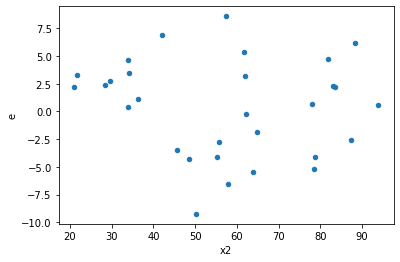

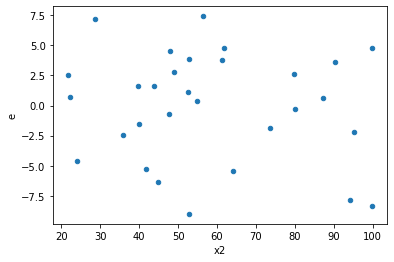

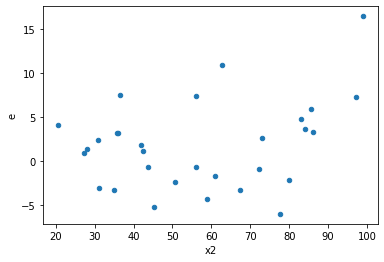

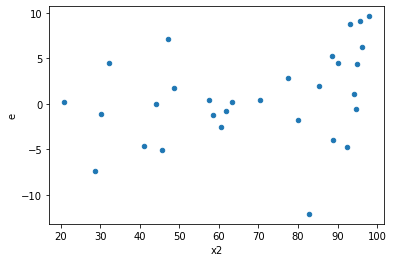

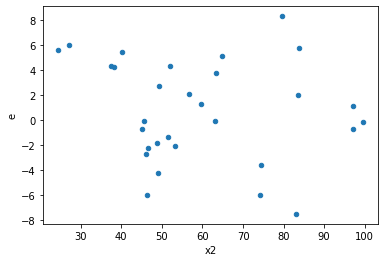

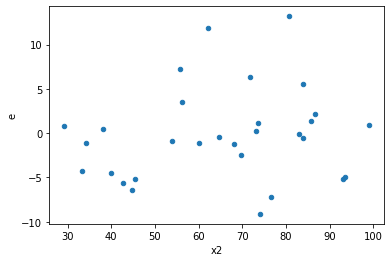

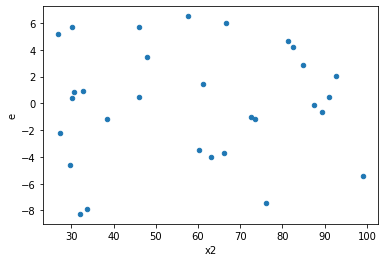

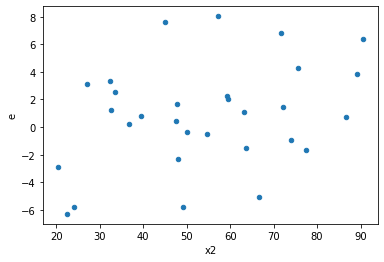

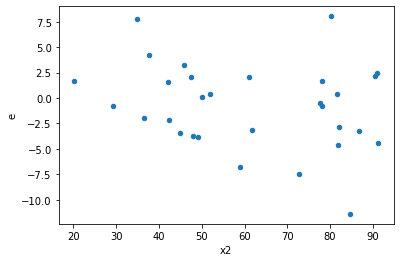

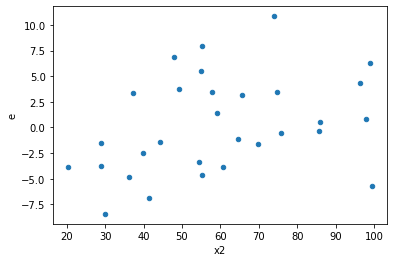

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,14.0,10.0,321.8786356114334,266.537442425235,22.991331115102387,26.653744242523498,1.159295393080367,0.8311914623186736,0.5844042688406632,0.4155957311593368,Reject005=1 : Homoscedasticity
2.0,15.0,9.0,345.30402456446694,225.59596963293225,23.020268304297797,25.066218848103585,1.0888760511719933,0.9290801669136366,0.5354599165431817,0.4645400834568183,Reject005=1 : Homoscedasticity
4.0,6.0,18.0,62.998461273787434,596.6067859985661,10.499743545631238,33.14482144436479,3.1567267619746553,0.05402982521341704,0.9729850873932915,0.02701491260670852,Reject005=1 : Homoscedasticity
9.0,17.0,7.0,466.63210449440834,398.07244667838455,27.44894732320049,56.86749238262637,2.0717549461199423,0.3317988460044681,0.834100576997766,0.16589942300223404,Reject005=1 : Homoscedasticity
10.0,10.0,14.0,142.52824853845988,286.4376382470414,14.252824853845988,20.459831303360097,1.4354930698414643,0.5209483508351935,0.7395258245824032,0.26047417541759676,Reject005=1 : Homoscedasticity
14.0,12.0,12.0,151.02925136239722,213.72488041218585,12.585770946866434,17.810406701015488,1.4151224248562912,0.5568190756976432,0.7215904621511784,0.2784095378488216,Reject005=1 : Homoscedasticity
15.0,12.0,12.0,87.41916649240198,403.01637368228916,7.284930541033499,33.58469780685743,4.610160332715105,0.013026441620588303,0.9934867791897058,0.006513220810294151,Reject005=0 : Heteroscedasticity
16.0,11.0,13.0,97.69627770774609,239.12953455664166,8.88147979161328,18.394579581280126,2.0711165270735625,0.21271214712183517,0.8936439264390824,0.10635607356091759,Reject005=1 : Homoscedasticity
22.0,11.0,13.0,166.30707085986216,445.16535025046926,15.118824623623834,34.243488480805325,2.264957054088607,0.16296831267716172,0.9185158436614191,0.08148415633858086,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,15.0,293.2916843165263,303.64206746576485,32.587964924058475,20.242804497717657,0.6211742446909642,0.47571889264231476,Reject005=1 : Homoscedasticity
1.0,14.0,10.0,321.8786356114334,266.537442425235,22.991331115102387,26.653744242523498,1.159295393080367,0.8311914623186736,Reject005=1 : Homoscedasticity
2.0,15.0,9.0,345.30402456446694,225.59596963293225,23.020268304297797,25.066218848103585,1.0888760511719933,0.9290801669136366,Reject005=1 : Homoscedasticity
3.0,13.0,11.0,809.222517321459,495.4546556018703,62.24788594780454,45.04133232744275,0.7235801126677676,0.5724424766803522,Reject005=1 : Homoscedasticity
4.0,6.0,18.0,62.998461273787434,596.6067859985661,10.499743545631238,33.14482144436479,3.1567267619746553,0.05402982521341704,Reject005=1 : Homoscedasticity
5.0,19.0,5.0,623.3139019022365,109.82888070810539,32.80599483695981,21.965776141621077,0.6695659208259719,0.47703403162855545,Reject005=1 : Homoscedasticity
6.0,15.0,9.0,572.4254872841632,330.5253194369025,38.16169915227754,36.72503549298917,0.9623532575539779,0.9097505487264606,Reject005=1 : Homoscedasticity
7.0,16.0,8.0,493.85464109956985,145.6894685606791,30.865915068723115,18.211183570084888,0.5900095146875638,0.35118141828488547,Reject005=1 : Homoscedasticity
8.0,17.0,7.0,852.9257019587952,41.061905957720036,50.17210011522325,5.865986565388576,0.1169173016859367,0.0003125957637828367,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      868
Reject005=0 : Heteroscedasticity    132
Name: Result_test, dtype: int64